<a href="https://colab.research.google.com/github/JuanM-GG/Biologia-de-sistemas/blob/main/optimizacion_parametrica_perfect_adaptation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Título: Optimización paramétrica. Adaptación perfecta

Nombre: Biología de sistemas

Fecha: 9 de diciembre del 2020

Cargar librerías

In [ ]:
install.packages("deSolve")
install.packages("FME")

In [28]:
source("Grind.R")

Loading required package: coda



grind.R was sourced


Definir función (esto es, el modelo)

In [30]:
model <- function(time, state, parms) {
  with(as.list(c(state, parms)), {

    dR <- k1*S - k2*R*x
    dx <- k3*S - k4*x 

    return(list(c(dR, dx)))
  })
}

Declarar primer solución para el valor de los parámetros 

In [31]:
p <- c(k1 = 1, k2 = 13, k3 = 1, k4 = 0.3, S = 2.5)

Establecer condiciones iniciales (las cuales, efectivamente, son parámetros)

In [33]:
s <- c(R = 0, x = 0)

Cargar datos

In [34]:
data <- data.frame(time = c(0, 0.5, 1, 2, 4, 6), R = c(0.0126,1.6059,0.8196,0.7323,0.5339,0.5613))

El nombre de las columnas en el *data.frame* con los datos debe ser igual al nombre de las variables en el modelo

Correr la optimización

SSR: 0.0136076  Estimates:
       k1        k2        k3        k4 
 6.032264 12.995404  0.912848  1.113765 


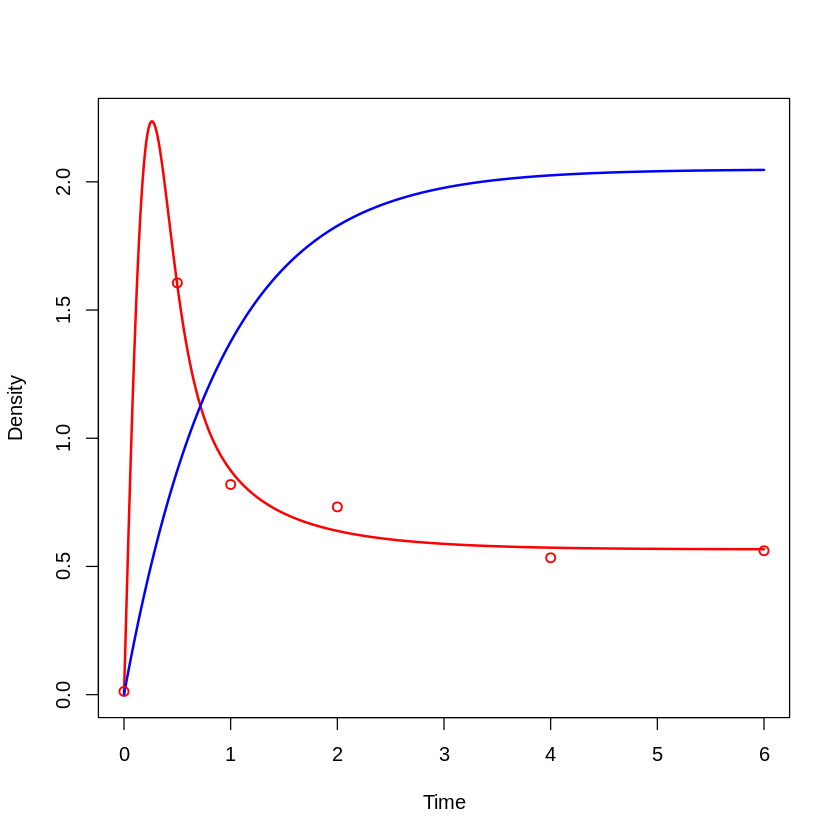

In [35]:
w <- c("k1", "k2", "k3", "k4") # nombres de los parámetros a optimizar
f <- fit(legend = FALSE, free = w, tstep = 0.0001, method = "BFGS")

Podemos revisar los rangos de confianza, valor p, etc. 

In [43]:
summary(f)

Warning message in sqrt(diag(covar) * resvar):
“NaNs produced”
Warning message in sqrt(1/diag(V)):
“NaNs produced”
Warning message in cov2cor(x$cov.unscaled):
“diag(.) had 0 or NA entries; non-finite result is doubtful”



Parameters:
   Estimate Std. Error t value Pr(>|t|)  
k1   6.0323     5.0823   1.187   0.3571  
k2  12.9954         NA      NA       NA  
k3   0.9128         NA      NA       NA  
k4   1.1138     0.1951   5.710   0.0293 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.08249 on 2 degrees of freedom

Parameter correlation:
        k1  k2  k3      k4
k1  1.0000 NaN NaN -0.6248
k2     NaN   1 NaN     NaN
k3     NaN NaN   1     NaN
k4 -0.6248 NaN NaN  1.0000

Para obtener solo los parámetros podemos f$par.

In [41]:
f$par

k1        k2        k3        k4 
 6.032264 12.995404  0.912848  1.113765

Para obtener la sumar de los errores al cuadrado usamos *f$ssr*

In [42]:
f$ssr

[1] 0.0136076